In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


diabetes_df=pd.read_csv('diabetes.csv')
X=diabetes_df.drop('Outcome',axis=1).values
y=diabetes_df['Outcome'].values

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=39)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

logReg=LogisticRegression()
logReg.fit(X_train_scaled,y_train)
y_pred=logReg.predict(X_test_scaled)
y_pred_proba=logReg.predict_proba(X_test_scaled)[:,1]
print(y_pred_proba[0])



0.46331831159980724


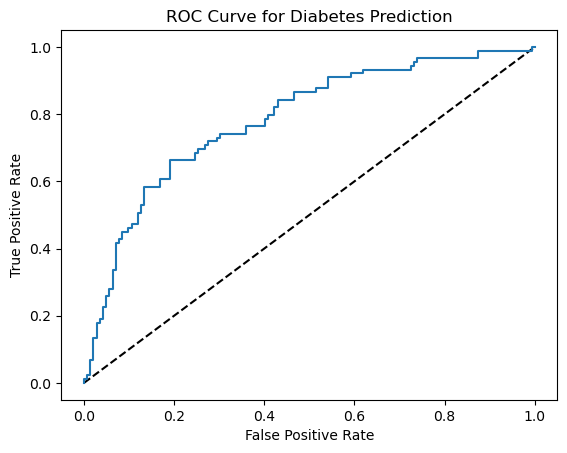

0.5010810823432182
0.2510822510822511
0.7489177489177489


In [12]:
# plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.
# If the roc curve is above the dotted line, It's much better

from sklearn.metrics import roc_curve, roc_auc_score, cassification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

fpr,tpr, threshold=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Diabetes Prediction")
plt.show()

mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)
accuracy_r2_score=logReg.score(X_test_scled, y_test)
# Accuracy or r2_score
r2_score1=logReg.score(X_test_scaled,y_test)

print(rmse)
print(mse)
print(r2_score1)
print(accuracy_r2_score)

In [13]:
#To quantify model performance based on this plot
#Calculate the area under the ''ROC curve' , a metric known as AUC.
#AUC and ROC for choosing model and threshold.
#AUC is a useful measure for comparing the performance of two different models.

print(roc_auc_score(y_test,y_pred_proba))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7831935432821648
[[123  19]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       142
           1       0.72      0.56      0.63        89

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231

